In [2]:
import numpy as np

def prob(n):
    pi = 1
    for i in range(1, n+1):
        pi *= i
    return pi


In [3]:
lamda = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

def CI_L(n, lamda):
    
    Sum = 0
    for i in range(n):
        Sum += lamda**i/prob(i)*np.exp(-lamda)
    
    P = 1-Sum
    return P

def CI_U(n, lamda):
    
    Sum = 0
    for i in range(n+1):
        Sum += lamda**i/prob(i)*np.exp(-lamda)
    
    return Sum

In [4]:
CI_L(0, 3)

1

In [5]:
for i in lamda:
    for n in range(100):
        if np.round(CI_U(n, i), 2) == 0.1:
            print(CI_U(n, i), "The n for upper bound of lamda =", i, "is", n)
            break

0.09963240048704602 The n for upper bound of lamda = 8 is 4


In [6]:
for i in lamda:
    for n in range(100):
        if np.round(CI_L(n, i), 2) == 0.1:
            print(CI_L(n, i), "The n for lower bound of lamda =", i, "is", n)
            break

0.09852079411091275 The n for lower bound of lamda = 7 is 11
0.10129100743983788 The n for lower bound of lamda = 12 is 17


In [7]:
# Suppose to show the uppper limit, but show the lower

for n in n_list:
    i = 0
    while i < 20:
        if np.round(CI_U(n, i), 3) == 0.1:
            print(np.round(CI_U(n, i), 3), "The lamda for upper bound of n =", n, "is", np.round(i, 2))
            break
        i += 0.001

0.1 The lamda for upper bound of n = 0 is 2.3
0.1 The lamda for upper bound of n = 1 is 3.88
0.1 The lamda for upper bound of n = 2 is 5.32
0.1 The lamda for upper bound of n = 3 is 6.67
0.1 The lamda for upper bound of n = 4 is 7.99
0.1 The lamda for upper bound of n = 5 is 9.27
0.1 The lamda for upper bound of n = 6 is 10.52
0.1 The lamda for upper bound of n = 7 is 11.76
0.1 The lamda for upper bound of n = 8 is 12.98
0.1 The lamda for upper bound of n = 9 is 14.19
0.1 The lamda for upper bound of n = 10 is 15.39
0.1 The lamda for upper bound of n = 11 is 16.59
0.1 The lamda for upper bound of n = 12 is 17.77


In [8]:
for n in n_list:
    i = 0
    while i < 10:
        if np.round(CI_L(n, i), 3) == 0.1 :
            print(np.round(CI_L(n, i), 3), "The lamda for lower bound of n=", n, "is", np.round(i, 2))
            break
        i += 0.001

0.1 The lamda for lower bound of n= 1 is 0.11
0.1 The lamda for lower bound of n= 2 is 0.53
0.1 The lamda for lower bound of n= 3 is 1.1
0.1 The lamda for lower bound of n= 4 is 1.74
0.1 The lamda for lower bound of n= 5 is 2.43
0.1 The lamda for lower bound of n= 6 is 3.15
0.1 The lamda for lower bound of n= 7 is 3.89
0.1 The lamda for lower bound of n= 8 is 4.65
0.1 The lamda for lower bound of n= 9 is 5.43
0.1 The lamda for lower bound of n= 10 is 6.22
0.1 The lamda for lower bound of n= 11 is 7.01
0.1 The lamda for lower bound of n= 12 is 7.82


In [9]:
### B. Confidence limits for Poisson processes

In [34]:
def CI_L2(n, lamdas = 0, lamdab = 1.8):
    
    Sum = 0
    for i in range(n):
        Sum += np.exp(-(lamdas+lamdab))*((lamdab+lamdas)**i/prob(i))
        
    return 1-Sum

def CI_U2(n, lamdas = 0, lamdab = 1.8):
    
    Sum = 0
    for i in range(n+1):
        Sum += np.exp(-(lamdas+lamdab))*((lamdab+lamdas)**i/prob(i))
        
    return Sum

In [30]:
def CI_L_sb(n, lamdas = 0, lamdab = 1.8):
    
    sumb = 0
    Sum = 0
    for i in range(n):
        sumb += lamdab**i/prob(i)
        Sum += ((lamdab+lamdas)**i/prob(i))
        
    ob = sumb*np.exp(-lamdab)
    sb = Sum*np.exp(-(lamdab+lamdas))    
    
    return 1-sb/ob

def CI_U_sb(n, lamdas = 0, lamdab = 1.8):
    
    sumb = 0
    Sum = 0
    for i in range(n+1):
        sumb += lamdab**i/prob(i)
        Sum += ((lamdab+lamdas)**i/prob(i))
        
    ob = sumb*np.exp(-lamdab)
    sb = Sum*np.exp(-(lamdab+lamdas))

    return sb/ob

In [77]:
# 2-1 

print("when n =", 5, "the probability of bkg presence only is", np.round(CI_L2(5, 0, 1.8), 3))

when n = 5 the probability of bkg presence only is 0.036


In [79]:
# 2-2

nuS = 5
while nuS <= 10:
    
    if np.round(CI_U2(5, nuS, 1.8), 5) == 0.05:
        print("The lamda_S for n = 5 is", np.round(nuS, 5))
        break
        
    nuS += 0.001

The lamda_S for n = 5 is 8.713


In [43]:
# C

In [70]:
s = np.random.poisson(nuS+1.8, 10000)

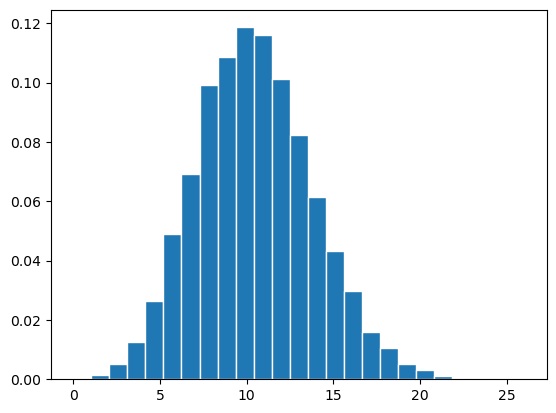

In [62]:
import matplotlib.pyplot as plt

plt.hist(s, bins = 25, edgecolor = 'white', density = True)
plt.show()

In [72]:
num = 0

for i in s:  
    if i <= 5:
        num += 1
        
print("The fraction of the events is", num/10000)

The fraction of the events is 0.0513
